<a href="https://colab.research.google.com/github/shweta2411/web_scraping_wiki_nba/blob/main/basketball_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Open a New Notebook and import the required libraires

import bs4
import requests
import pandas as pd
import numpy as np
!pip install boto3
import boto3
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
#Reading the webpage

def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordon'):
  response = requests.get(link)
  soup = bs4.BeautifulSoup(response.text,'html.parser')

#Main Function Process
  table = soup.find(class_='wikitable sortable')
  headers = table.tr
  titles = headers.find_all('abbr')
  data = {title['title']: [] for title in titles}
  for row in table.find_all('tr')[1:]:
    for key, a in zip(data.keys(),row.find_all('td')[2:]):
      data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))
      Min = min([len(x) for x in data.values()])
  for key in data.keys():
        data[key] = list(map(lambda x: float(x), data[key][:Min]))
  return data

#Declaring links and names of the personals to scrap the data


links=['https://en.wikipedia.org/wiki/Michael_Jordon'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
       ,'https://en.wikipedia.org/wiki/LeBron_James'\
       ,'https://en.wikipedia.org/wiki/Stephen_Curry']

names=['Michael Jordon','Kobe Bryant','Lebron James','Stephen Curry']

michael_jordon_dict = get_basketball_stats(links[0])
kobe_bryant_dict = get_basketball_stats(links[1])
lebron_james_dict = get_basketball_stats(links[2])
stephen_curry_dict = get_basketball_stats(links[3])

mj_table = pd.DataFrame(michael_jordon_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)
lj_table = pd.DataFrame(lebron_james_dict)
sc_table = pd.DataFrame(stephen_curry_dict)

list_table =[mj_table,kb_table,lj_table,sc_table]

i=0
for name in names:
  print(name)
  display(list_table[i])
  i += 1

Michael Jordon


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5
5,80.0,80.0,38.3,0.469,0.250,0.829,5.5,5.5,1.5,0.4,25.2
6,82.0,82.0,41.5,0.451,0.383,0.843,6.9,5.9,2.2,0.8,30.0
7,65.0,64.0,37.6,0.438,0.327,0.852,5.5,5.1,1.7,0.4,24.0
8,66.0,66.0,40.7,0.433,0.339,0.816,5.9,6.0,1.3,0.8,27.6
9,80.0,80.0,41.0,0.450,0.347,0.850,5.3,4.5,1.8,0.4,35.4


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4
6,76.0,76.0,39.0,0.503,0.333,0.767,7.3,8.6,1.6,1.0,29.7
7,79.0,79.0,38.8,0.510,0.330,0.759,7.5,7.0,1.6,0.6,26.7
8,62.0,62.0,37.5,0.531,0.362,0.771,7.9,6.2,1.9,0.8,27.1
9,76.0,76.0,37.9,0.565,0.406,0.753,8.0,7.3,1.7,0.9,26.8


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0
5,80.0,80.0,32.7,0.487,0.443,0.914,4.3,7.7,2.0,0.2,23.8
6,79.0,79.0,34.2,0.504,0.454,0.908,5.4,6.7,2.1,0.2,30.1
7,79.0,79.0,33.4,0.468,0.411,0.898,4.5,6.6,1.8,0.2,25.3
8,51.0,51.0,32.0,0.495,0.423,0.921,5.1,6.1,1.6,0.2,26.4
9,69.0,69.0,33.8,0.472,0.437,0.916,5.3,5.2,1.3,0.4,27.3


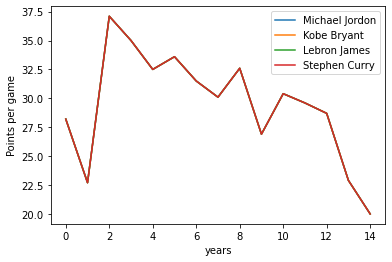

In [ ]:
#Making a plot using matplotlib

j=0
for name in names:
  plt.plot(list_table[j][['Points per game']],label=name)
  plt.legend()
  plt.xlabel('years')
  plt.ylabel('Points per game')


In [ ]:
#Storing the Player Statistics in Object Storage

csv_name = 'MJl.csv'
mj_table.to_csv(csv_name)
mj_table



,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9
